In [ ]:
#importation des biblioteques
import tensorflow as tf                                                       
from keras.src.legacy.preprocessing.image import ImageDataGenerator                        
from sklearn.model_selection import train_test_split                            
import numpy as np                                               
import os                                               
import matplotlib.pyplot as plt                         
from tqdm import tqdm                                  
import random                                      

In [ ]:
#importation du data 
IMAGE_SIZE = (150,150) 

def load_data():
    datasets = ["C:/Users/GIGABYTE/Desktop/train", "C:/Users/GIGABYTE/Desktop/test"]
    output = []
    
    # Creer la liste des classes à partir du dossier train
    train_path = "C:/Users/GIGABYTE/Desktop/train"
    classes = sorted(os.listdir(train_path))
    class_names_label = {class_name: i for i, class_name in enumerate(classes)}
    
    print("Classes trouvées:", class_names_label)
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [22]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Classes trouvées: {'Actinic keratoses': 0, 'Basal cell carcinoma': 1, 'Benign keratosis-like lesions': 2, 'Chickenpox': 3, 'Cowpox': 4, 'Dermatofibroma': 5, 'HFMD': 6, 'Healthy': 7, 'Measles': 8, 'Melanocytic nevi': 9, 'Melanoma': 10, 'Monkeypox': 11, 'Squamous cell carcinoma': 12, 'Vascular lesions': 13}
Loading C:/Users/GIGABYTE/Desktop/train


100%|██████████| 202/202 [00:03<00:00, 63.95it/s] 


Loading C:/Users/GIGABYTE/Desktop/test


100%|██████████| 26/26 [00:00<00:00, 64.92it/s]


In [ ]:
n_train = train_labels.shape
n_test = test_labels.shape

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

print(train_labels.shape)
print(test_labels.shape)

print(train_images.shape)

Number of training examples: (29322,)
Number of testing examples: (3674,)
Each image is of size: (150, 150)
(29322,)
(3674,)
(29322, 150, 150, 3)


In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

Images d'entraînement par classe:


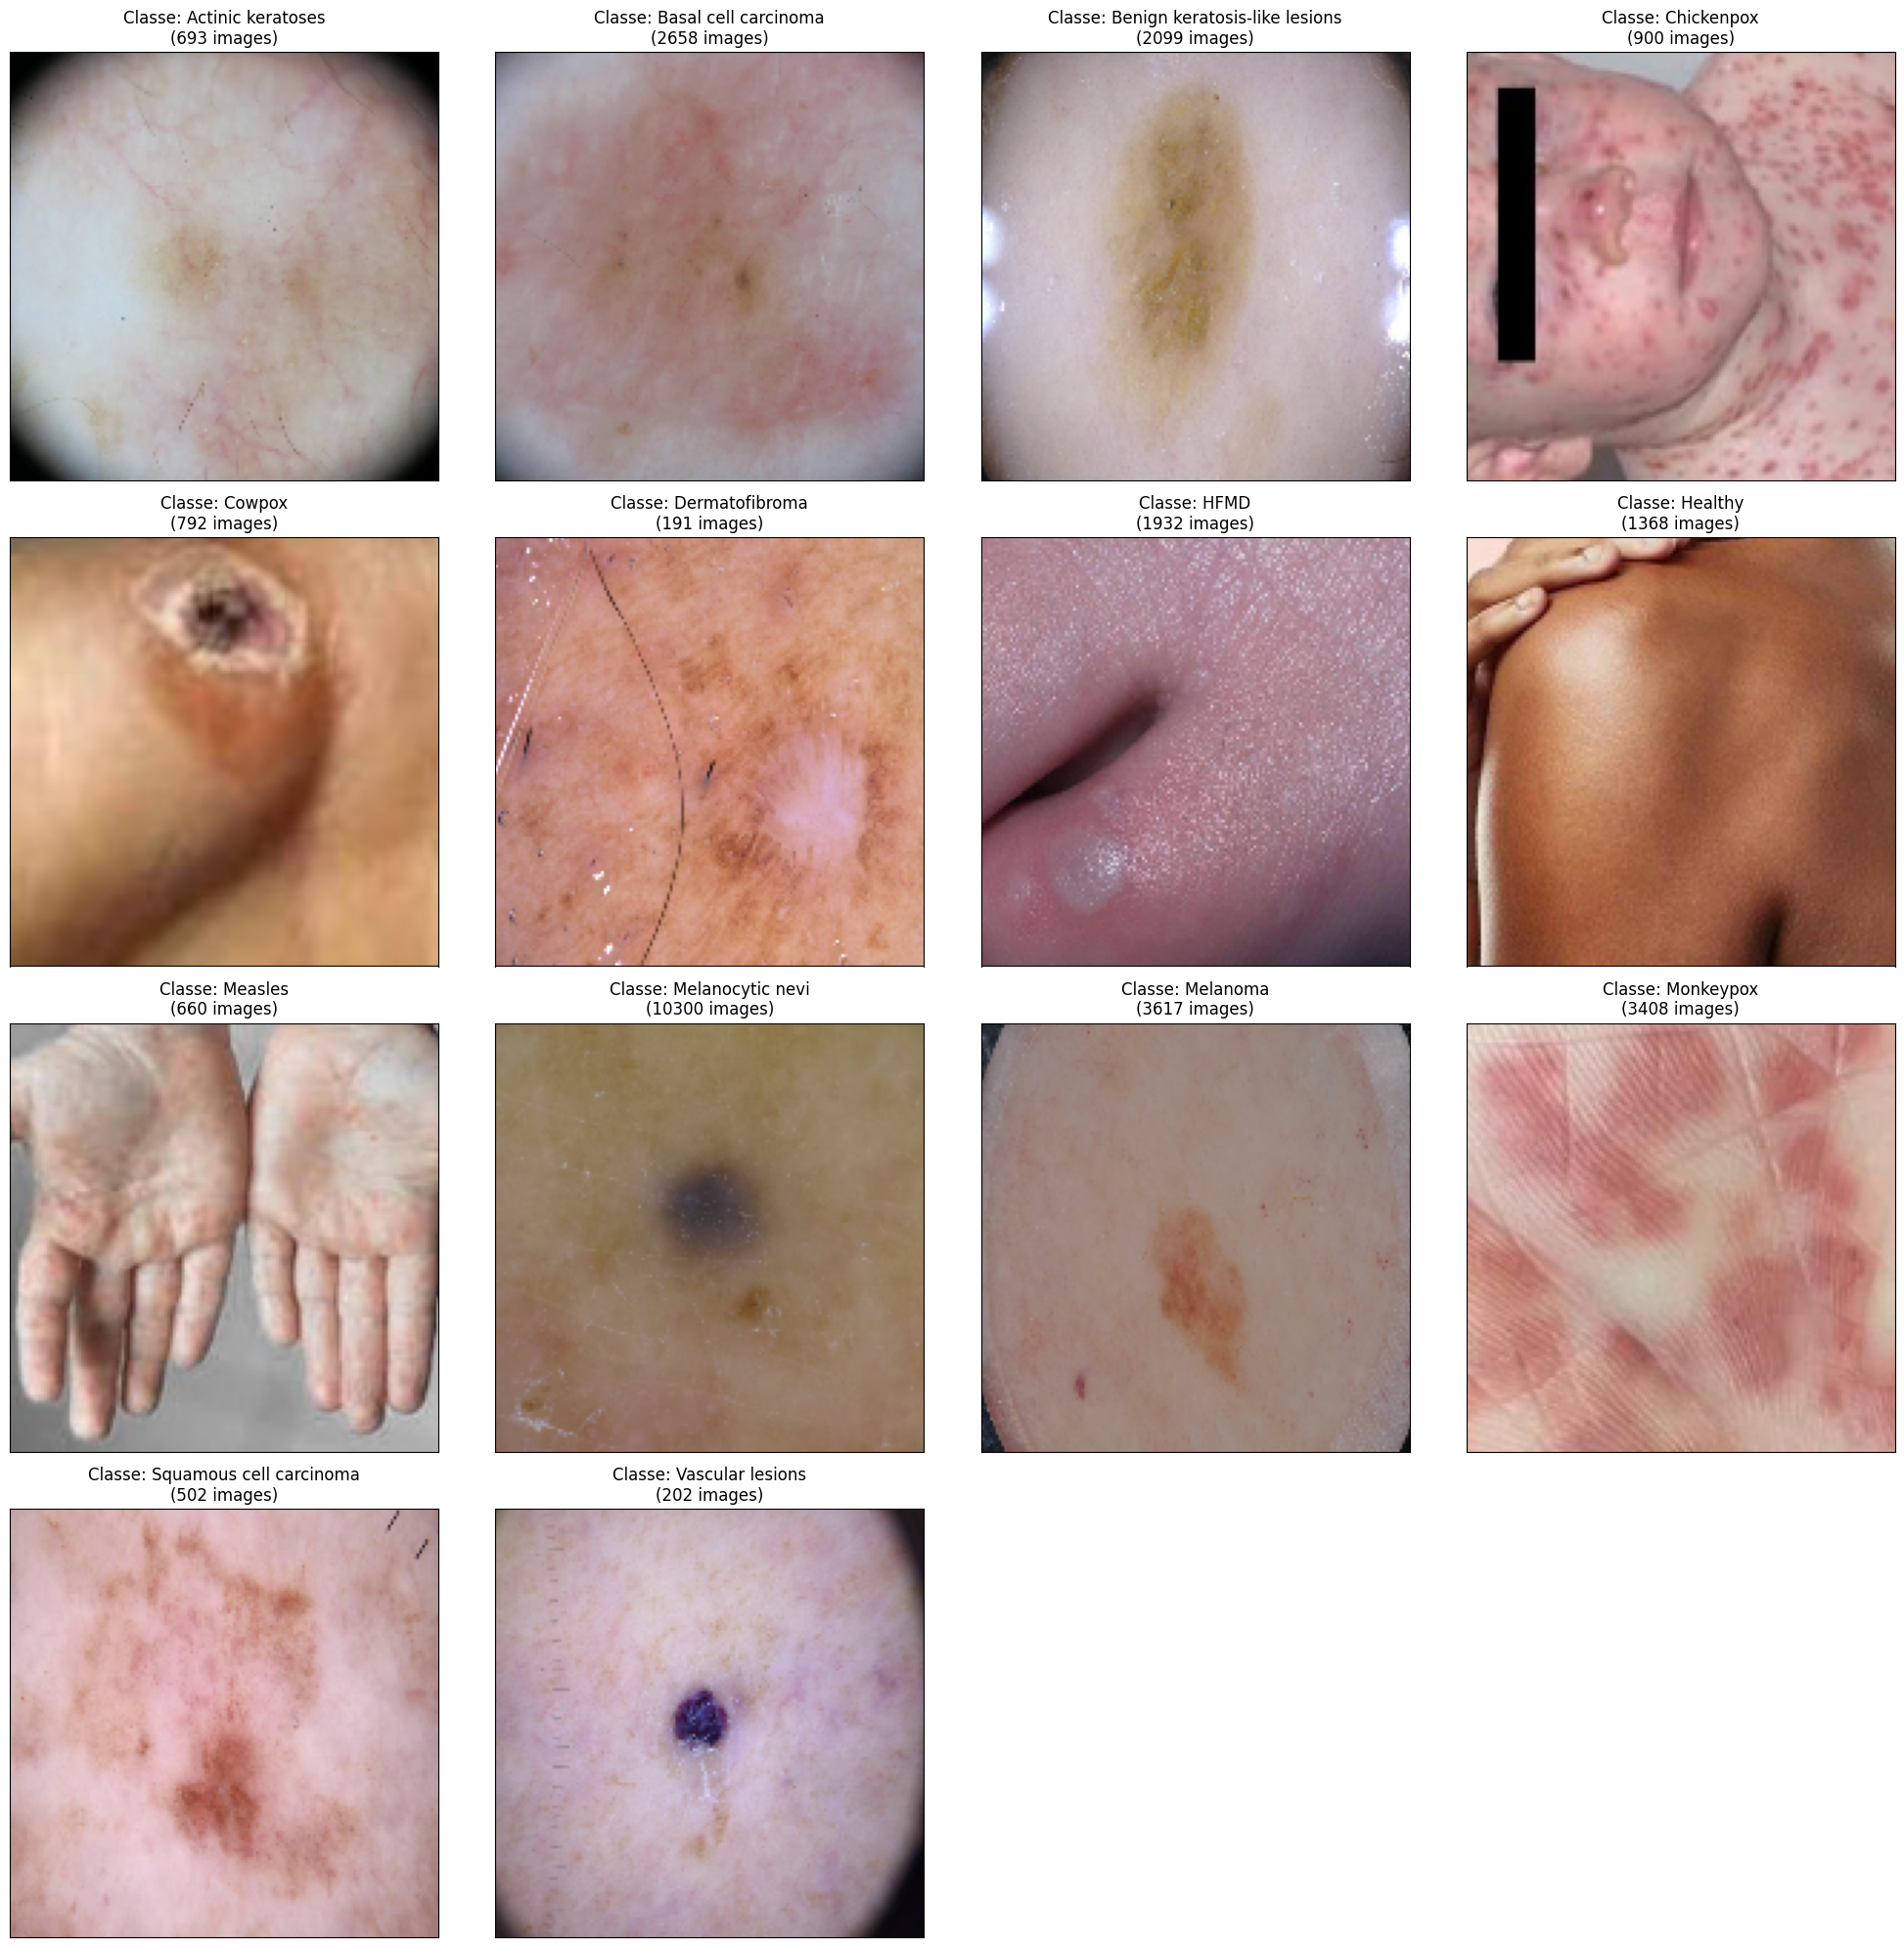

In [ ]:

def display_random_images_by_class(class_names, images, labels):
    """
    Affiche une image aléatoire pour chaque classe
    """
    # Obtenir les classes uniques
    unique_classes = np.unique(labels)
    
    # Déterminer la disposition de la grille
    n_classes = len(unique_classes)
    n_cols = min(4, n_classes)  # Maximum 4 colonnes
    n_rows = (n_classes + n_cols - 1) // n_cols  # Calcul du nombre de lignes
    
    plt.figure(figsize=(5 * n_cols, 5 * n_rows))
    
    for i, class_id in enumerate(unique_classes):
        # Trouver tous les indices d'images de cette classe
        class_indices = np.where(labels == class_id)[0]
        
        # Choisir un index aléatoire
        random_idx = np.random.choice(class_indices)
        
        # Afficher l'image
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[random_idx])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        # Trouver le nom de la classe (inverser le dictionnaire)
        class_name = [name for name, idx in class_names_label.items() if idx == class_id][0]
        plt.title(f'Classe: {class_name}\n({len(class_indices)} images)')
    
    plt.tight_layout()
    plt.show()

# Créer le mapping des noms de classes
train_path = "C:/Users/GIGABYTE/Desktop/train"
classes = sorted(os.listdir(train_path))
class_names_label = {class_name: i for i, class_name in enumerate(classes)}

# Afficher les images d'entraînement
print("Images d'entraînement par classe:")
display_random_images_by_class(class_names_label, train_images, train_labels)

# Afficher les images de test
#print("\nImages de test par classe:")
#display_random_images_by_class(class_names_label, test_images, test_labels) 


        

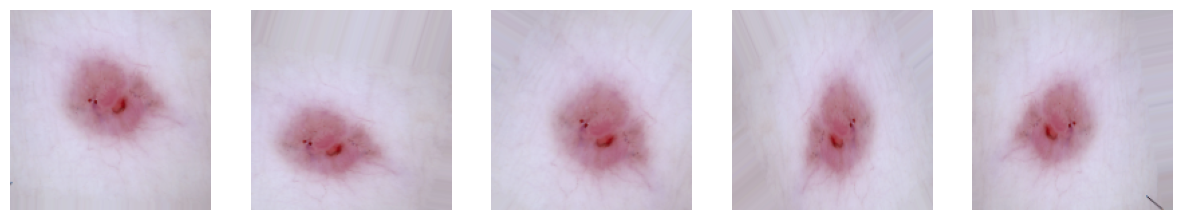

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator for training
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Validation - SEULEMENT la normalisation (pas d'augmentation)
val_datagen = ImageDataGenerator()

# Test - SEULEMENT la normalisation (pas d'augmentation)  
test_datagen = ImageDataGenerator()

# Visualisation d'une image augmentee 
example_image = train_images[700]
example_image = example_image.reshape((1,) + example_image.shape)  # Reshape to (1, height, width, channels)

fig, ax = plt.subplots(1, 5, figsize=(15, 3))

for i, augmented_image in enumerate(datagen.flow(example_image, batch_size=1)):
    ax[i].imshow(augmented_image[0])
    ax[i].axis('off')

    if i == 4:
        break

plt.show()


In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Préparer les labels pour la classification (one-hot encoding)
num_classes = len(class_names_label)
print(f"\nNombre de classes: {num_classes}")

# Convertir les labels en format one-hot encoding
train_labels_categorical = to_categorical(train_labels, num_classes=num_classes)
test_labels_categorical = to_categorical(test_labels, num_classes=num_classes)

print("Shape des labels d'entraînement (one-hot):", train_labels_categorical.shape)
print("Shape des labels de test (one-hot):", test_labels_categorical.shape)


Nombre de classes: 14
Shape des labels d'entraînement (one-hot): (29322, 14)
Shape des labels de test (one-hot): (3674, 14)


In [ ]:
# le modele CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Bloc 1 - 
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Bloc 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Bloc 3 - 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  #  pour éviter l'overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) 

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher la structure du modèle
print("\n" + "="*50)
print("ARCHITECTURE DU MODÈLE")
print("="*50)
print(model.summary())

c:\Users\GIGABYTE\anaconda3\envs\dl_project\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



ARCHITECTURE DU MODÈLE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,745,038 (40.99 MB)

 Trainable params: 10,745,038 (40.99 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=8, 
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Entraînement du modèle
print("\n" + "="*50)
print("DÉBUT DE L'ENTRAÎNEMENT")
print("="*50)

history = model.fit(
    train_images, 
    train_labels_categorical,
    batch_size=32,
    epochs=35,
    validation_data=(test_images, test_labels_categorical),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


DÉBUT DE L'ENTRAÎNEMENT
Epoch 1/35
917/917 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.3440 - loss: 2.2292
Epoch 1: val_loss improved from inf to 1.69573, saving model to best_model.keras
917/917 ━━━━━━━━━━━━━━━━━━━━ 246s 261ms/step - accuracy: 0.3441 - loss: 2.2288 - val_accuracy: 0.4513 - val_loss: 1.6957
Epoch 2/35
917/917 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.4499 - loss: 1.6600
Epoch 2: val_loss improved from 1.69573 to 1.63754, saving model to best_model.keras
917/917 ━━━━━━━━━━━━━━━━━━━━ 210s 229ms/step - accuracy: 0.4499 - loss: 1.6600 - val_accuracy: 0.4624 - val_loss: 1.6375
Epoch 3/35
917/917 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.4862 - loss: 1.5113
Epoch 3: val_loss improved from 1.63754 to 1.54394, saving model to best_model.keras
917/917 ━━━━━━━━━━━━━━━━━━━━ 219s 239ms/step - accuracy: 0.4862 - loss: 1.5113 - val_accuracy: 0.4921 - val_loss: 1.5439
Epoch 4/35
917/917 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.5056 - loss: 1.4501
Epoch 4: 

Accuracy sur le test set: 0.6277
Loss sur le test set: 1.0854


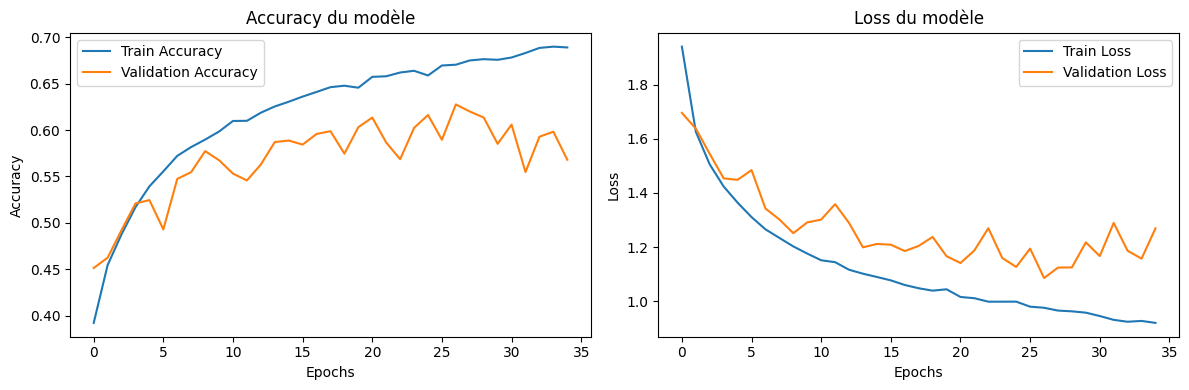

In [ ]:
# Evaluation du modele

# Charger le meilleur modele sauvegardé
from tensorflow.keras.models import load_model
best_model = load_model('best_model.keras')

# Évaluation sur les données de test
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels_categorical, verbose=0)
print(f"Accuracy sur le test set: {test_accuracy:.4f}")
print(f"Loss sur le test set: {test_loss:.4f}")

# Visualisation des performances
plt.figure(figsize=(12, 4))

# Graphique de l'accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy du modèle')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Graphique de la loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss du modèle')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

from tensorflow.keras.models import save_model

# Sauvegarder le modèle
model.save('modele_cnn.h5')
print("Modèle sauvegardé comme 'modele_cnn.h5'")

# Vérifier que le fichier existe
import os
print("Fichier créé :", os.path.exists('modele_cnn.h5'))

Modèle sauvegardé comme 'modele_cnn.h5'
Fichier créé : True
